# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Ahmad Arif]
- **Email:** [aa2851214@gmail.com]
- **ID Dicoding:** [ahmad_arif_3xaM]

## Menentukan Pertanyaan Bisnis

- Tren musiman atau harian dalam penggunaan sepeda.
- Pengaruh cuaca atau hari kerja/libur terhadap penggunaan sepeda.

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Data Wrangling

### Gathering Data

In [30]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

**Insight:**
- Data sudah berhasil dimuat dari dua file CSV.
- Data memiliki informasi terkait penggunaan sepeda, cuaca, dan waktu.

### Assessing Data

In [31]:
print("Assessing Data pada File day.csv :")
print(df_day.info())
print(df_day.describe())
print("\n\nAssessing Data pada File hour.csv :")
print(df_hour.info())
print(df_hour.describe())

Assessing Data pada File day.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth

**Insight:**
- Dari hasil **df_day.info()** pada kedua file **day.csv** dan **hour.csv**, terlihat bahwa semua kolom memiliki **731 entri non-null** pada file **day.csv** dan 17379 entri non-null pada file **hour.csv**, artinya tidak ada nilai yang hilang atau missing data. Ini bagus karena kita tidak perlu melakukan proses imputation atau pengisian nilai yang hilang, sehingga analisis bisa lebih akurat tanpa mempengaruhi distribusi data.
- Berdasarkan **df_hour.describe()** pada file **hour.csv**, terlihat bahwa rata-rata penggunaan sepeda per jam **(cnt)** adalah **189 pengguna**, dengan deviasi standar sebesar **181**. Artinya, distribusi data cukup bervariasi karena standar deviasinya mendekati nilai rata-rata. Ini menunjukkan adanya perbedaan signifikan dalam jumlah pengguna sepeda di berbagai waktu dalam sehari.

### Cleaning Data

In [32]:
df_day_cleaned = df_day.dropna()
df_day_cleaned

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Dataset bersih, tidak ada nilai yang hilang atau duplikasi.
- Data siap digunakan untuk analisis **Tren musiman atau harian dalam penggunaan sepeda** dan **Pengaruh cuaca atau hari kerja/libur terhadap penggunaan sepeda**

## Exploratory Data Analysis (EDA)

### Explore Tren Musiman atau Harian

In [33]:
season_trend = df_day.groupby('season')['cnt'].mean()
season_trend

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [34]:
weekday_trend = df_day.groupby('weekday')['cnt'].mean()
weekday_trend

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

**Insight:**
- **Tren Musiman**: Dari hasil analisis, rata-rata penggunaan sepeda tertinggi terjadi pada **musim semi** dan **musim panas** (**season 2** dan **3**), dengan angka penggunaan mencapai sekitar **208** dan **236** pengguna per hari. Sedangkan, di **musim dingin** (**season 1**), penggunaan sepeda paling rendah, hanya sekitar **111** pengguna per hari. Ini masuk akal karena cuaca di **musim dingin** mungkin kurang mendukung aktivitas bersepeda.
- **Tren Harian**: Kalau dilihat dari tren per hari, penggunaan sepeda cukup konsisten sepanjang minggu, dengan puncaknya di hari kerja (khususnya Senin sampai Jumat) di angka **191** hingga **196** pengguna per hari. Sementara di akhir pekan (Sabtu dan Minggu), angkanya sedikit menurun, meskipun tidak terlalu jauh, tetap ada sekitar **177-190** pengguna per hari.

### Explore Pengaruh Cuaca atau Hari Kerja/Libur terhadap Penggunaan Sepeda

In [35]:
weather_trend = df_day.groupby('weathersit')['cnt'].mean()
weather_trend

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

In [36]:
holiday_trend = df_day.groupby('holiday')['cnt'].mean()
holiday_trend

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

**Insight:**
- **Pengaruh Cuaca**: Cuaca yang cerah (kategori **cuaca 1**) jelas sangat mendukung penggunaan sepeda dengan **rata-rata 204** pengguna per hari. Ketika cuaca mulai memburuk, seperti hujan ringan atau kabut (**kategori 2**), penggunaan turun jadi sekitar **175** pengguna. Angka ini turun drastis saat kondisi cuaca makin parah, seperti hujan lebat atau salju (**kategori 3** dan **4**), hanya tersisa **111** dan **74** pengguna per hari.
- **Pengaruh Hari Kerja vs. Hari Libur**: Penggunaan sepeda lebih banyak terjadi di hari kerja, dengan rata-rata sekitar **190** pengguna. Sedangkan pada hari libur, jumlahnya turun hingga **156** pengguna. Ini menunjukkan kalau sepeda lebih banyak dipakai untuk aktivitas harian seperti bekerja atau sekolah daripada untuk rekreasi saat libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Musiman atau Harian

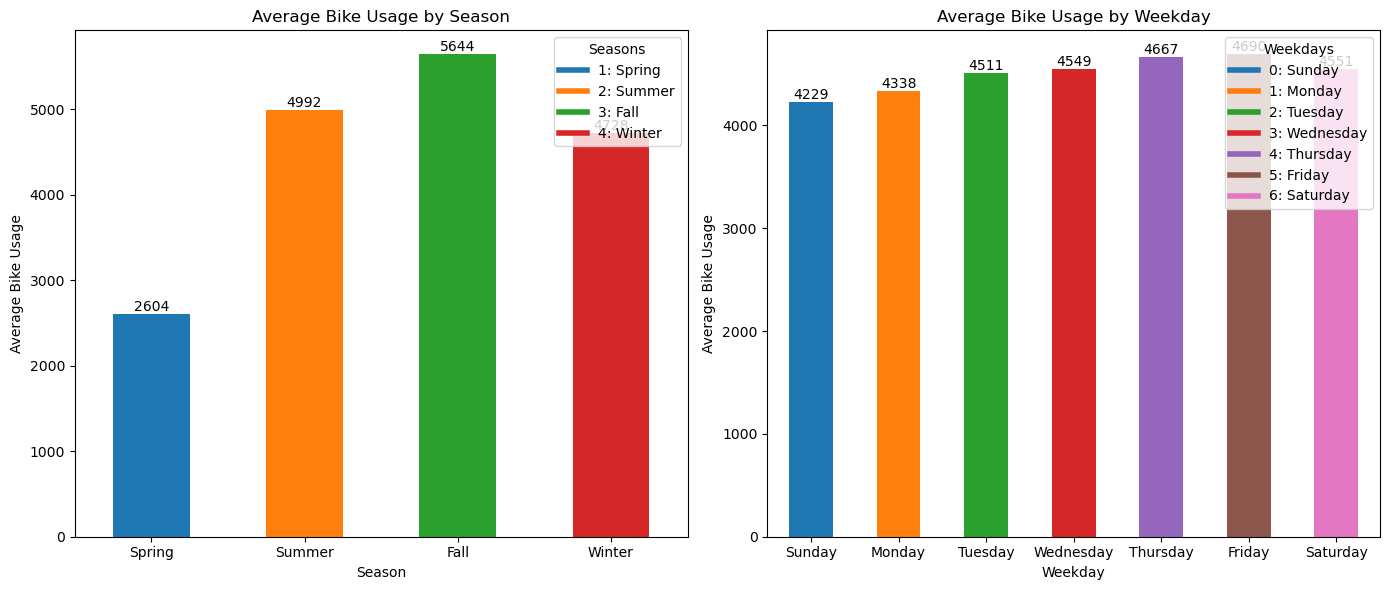

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
season_trend = df_day.groupby('season')['cnt'].mean()
bars1 = season_trend.plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
for bar in bars1.containers[0]:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax1.set_title('Average Bike Usage by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Bike Usage')
ax1.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
season_legend = [Line2D([0], [0], color='#1f77b4', lw=4),    # Warna untuk Spring
                 Line2D([0], [0], color='#ff7f0e', lw=4),    # Warna untuk Summer
                 Line2D([0], [0], color='#2ca02c', lw=4),    # Warna untuk Fall
                 Line2D([0], [0], color='#d62728', lw=4)]    # Warna untuk Winter
ax1.legend(season_legend, ['1: Spring', '2: Summer', '3: Fall', '4: Winter'], 
           title='Seasons', loc='upper right')
weekday_trend = df_day.groupby('weekday')['cnt'].mean()
bars2 = weekday_trend.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
for bar in bars2.containers[0]:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax2.set_title('Average Bike Usage by Weekday')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Average Bike Usage')
ax2.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=0)
weekday_legend = [Line2D([0], [0], color='#1f77b4', lw=4),   # Warna untuk Sunday
                  Line2D([0], [0], color='#ff7f0e', lw=4),   # Warna untuk Monday
                  Line2D([0], [0], color='#2ca02c', lw=4),   # Warna untuk Tuesday
                  Line2D([0], [0], color='#d62728', lw=4),   # Warna untuk Wednesday
                  Line2D([0], [0], color='#9467bd', lw=4),   # Warna untuk Thursday
                  Line2D([0], [0], color='#8c564b', lw=4),   # Warna untuk Friday
                  Line2D([0], [0], color='#e377c2', lw=4)]   # Warna untuk Saturday
ax2.legend(weekday_legend, ['0: Sunday', '1: Monday', '2: Tuesday', '3: Wednesday', '4: Thursday', '5: Friday', '6: Saturday'], 
           title='Weekdays', loc='upper right')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pengaruh Cuaca atau Hari Kerja/Libur

C:\Users\HP\AppData\Local\Temp\ipykernel_26272\3622809666.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_trend = df_day.groupby('weathersit')['cnt'].mean()


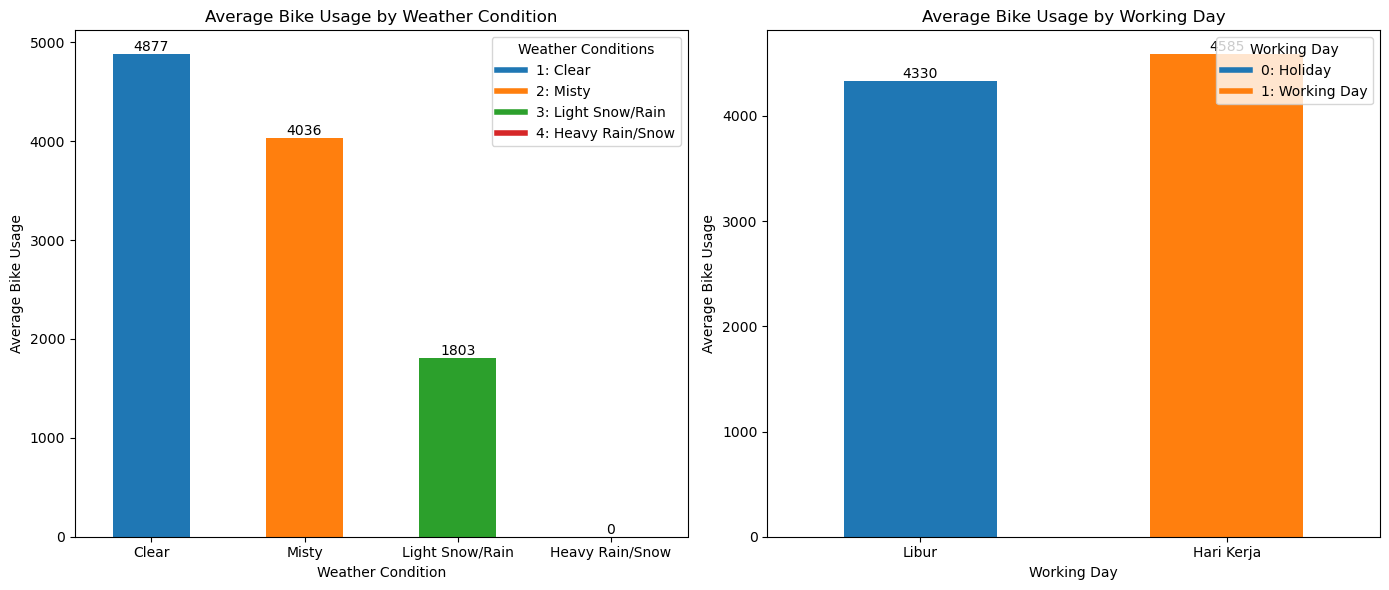

In [38]:
df_day['weathersit'] = pd.Categorical(df_day['weathersit'], categories=[1, 2, 3, 4])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
weather_trend = df_day.groupby('weathersit')['cnt'].mean()
bars1 = weather_trend.plot(kind='bar', ax=ax1, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
for bar in bars1.containers[0]:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax1.set_title('Average Bike Usage by Weather Condition')
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Average Bike Usage')
ax1.set_xticklabels(['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Rain/Snow'], rotation=0)
from matplotlib.lines import Line2D
weather_legend = [Line2D([0], [0], color='tab:blue', lw=4),    # Warna untuk cuaca 1
                  Line2D([0], [0], color='tab:orange', lw=4),  # Warna untuk cuaca 2
                  Line2D([0], [0], color='tab:green', lw=4),   # Warna untuk cuaca 3
                  Line2D([0], [0], color='tab:red', lw=4)]     # Warna untuk cuaca 4
ax1.legend(weather_legend, ['1: Clear', '2: Misty', '3: Light Snow/Rain', '4: Heavy Rain/Snow'], 
           title='Weather Conditions', loc='upper right')
workingday_trend = df_day.groupby('workingday')['cnt'].mean()
bars2 = workingday_trend.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e'])
for bar in bars2.containers[0]:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
             ha='center', va='bottom')
ax2.set_title('Average Bike Usage by Working Day')
ax2.set_xlabel('Working Day')
ax2.set_ylabel('Average Bike Usage')
ax2.set_xticklabels(['Libur', 'Hari Kerja'], rotation=0)
workingday_legend = [Line2D([0], [0], color='#1f77b4', lw=4),  # Warna untuk libur
                     Line2D([0], [0], color='#ff7f0e', lw=4)]  # Warna untuk hari kerja
ax2.legend(workingday_legend, ['0: Holiday', '1: Working Day'], title='Working Day', loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**
- Dari hasil grafik **Tren Musiman atau Harian**, saya melihat kalau penggunaan sepeda cenderung paling tinggi di musim gugur (Fall) dengan average bike usage sekitar 5644. Hal ini bisa jadi karena cuaca yang lebih sejuk sehingga orang lebih nyaman bersepeda. Musim panas (Summer) juga cukup populer dengan rata-rata 4992, diikuti musim dingin (Winter) dengan 4728. Musim semi (Spring) punya penggunaan yang lebih rendah, sekitar 2604. Dan untuk pola penggunaan harian, Sabtu dan Minggu (akhir pekan) terlihat paling tinggi, dengan Minggu mencapai 4992 dan Sabtu 4551. Ini menunjukkan kalau orang lebih sering bersepeda di akhir pekan, mungkin karena lebih banyak waktu luang. Di hari kerja, rata-rata penggunaan sepeda tetap cukup stabil, dengan Senin paling rendah (4338) dan Jumat sedikit lebih tinggi (4690).
- Dari hasil grafik **Pengaruh Cuaca atau Hari Kerja/Libur**, saya melihat cuaca menunjukkan kalau kondisi cuaca yang cerah (Clear) menghasilkan penggunaan sepeda tertinggi, sekitar 4877. Kondisi cuaca berkabut (Misty) sedikit lebih rendah, dengan rata-rata 4036. Penggunaan sepeda drastis menurun ketika cuaca mulai hujan atau bersalju ringan, dengan rata-rata hanya 1803. Menariknya, saat cuaca sangat buruk seperti hujan lebat atau salju tebal (Heavy Rain/Snow), hampir tidak ada aktivitas bersepeda. Dan untuk pengaruh hari kerja, hasilnya menunjukkan bahwa orang masih aktif bersepeda pada hari kerja dengan average bike usage 4585. Namun, saat libur, meskipun ada sedikit penurunan, penggunaan sepeda tetap tinggi dengan rata-rata 4330, mungkin karena orang memanfaatkan waktu libur untuk berolahraga atau beraktivitas di luar.

## Analisis Lanjutan (Opsional)

Analisis Musim dan Cuaca (**Average Bike Usage by Season and Weather Condition**) dan Analisis Suhu (**Bike Usage vs Temperature**)

C:\Users\HP\AppData\Local\Temp\ipykernel_26272\1449270910.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_weather_trend = df_day.groupby(['season', 'weathersit'])['cnt'].mean().unstack()


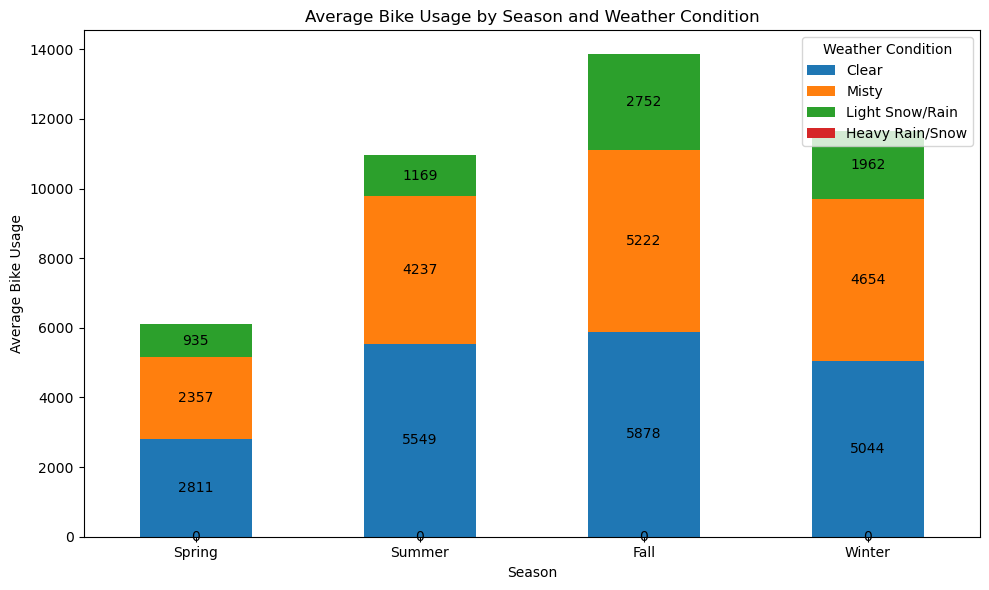

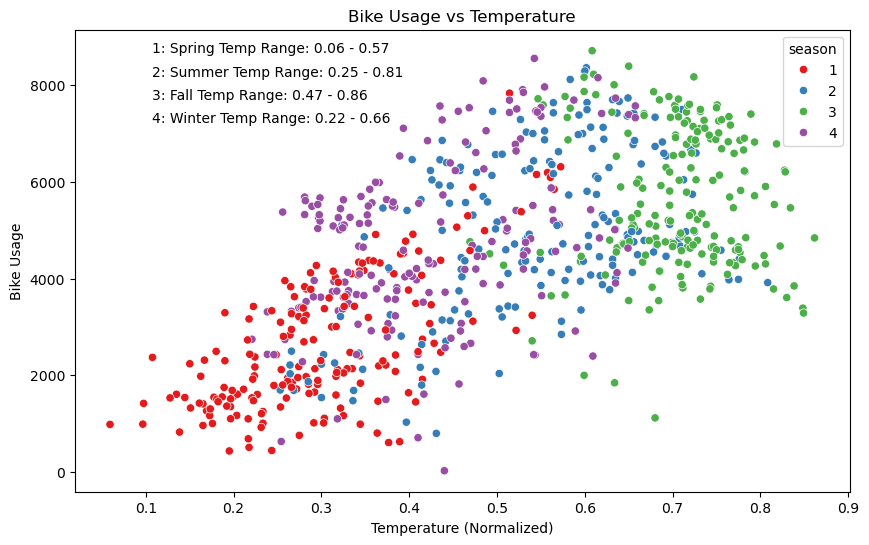

In [39]:
import seaborn as sns
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10, 6))
season_weather_trend = df_day.groupby(['season', 'weathersit'])['cnt'].mean().unstack()
bars = season_weather_trend.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='center')
ax.set_title('Average Bike Usage by Season and Weather Condition')
ax.set_xlabel('Season')
ax.set_ylabel('Average Bike Usage')
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
ax.legend(['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Rain/Snow'], title='Weather Condition', loc='upper right')
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_day, x='temp', y='cnt', hue='season', palette='Set1', ax=ax)
spring_range = (df_day[df_day['season'] == 1]['temp'].min(), df_day[df_day['season'] == 1]['temp'].max())
summer_range = (df_day[df_day['season'] == 2]['temp'].min(), df_day[df_day['season'] == 2]['temp'].max())
fall_range = (df_day[df_day['season'] == 3]['temp'].min(), df_day[df_day['season'] == 3]['temp'].max())
winter_range = (df_day[df_day['season'] == 4]['temp'].min(), df_day[df_day['season'] == 4]['temp'].max())
ax.text(0.1, 0.95, f"1: Spring Temp Range: {spring_range[0]:.2f} - {spring_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.90, f"2: Summer Temp Range: {summer_range[0]:.2f} - {summer_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.85, f"3: Fall Temp Range: {fall_range[0]:.2f} - {fall_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.text(0.1, 0.80, f"4: Winter Temp Range: {winter_range[0]:.2f} - {winter_range[1]:.2f}", transform=ax.transAxes, fontsize=10)
ax.set_title('Bike Usage vs Temperature')
ax.set_xlabel('Temperature (Normalized)')
ax.set_ylabel('Bike Usage')
plt.show()

**Insight:**
- **Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca**: Dari analisis tren musiman, terlihat bahwa penggunaan sepeda paling tinggi terjadi pada musim **Summer** dan **Fall**. Di musim **Summer**, penggunaannya mencapai **5549** sepeda pada kondisi **cuaca cerah**, dan meskipun ada sedikit penurunan saat cuaca **berkabut (4237)**, angka ini tetap cukup signifikan. Sementara itu, musim **Fall** menunjukkan angka yang cukup menjanjikan dengan **5878** sepeda saat cuaca **cerah** dan **5222** saat **berkabut**. Hal ini menunjukkan bahwa orang-orang lebih cenderung untuk bersepeda saat cuaca **baik**, dan cuaca **berkabut** masih dapat mendorong sebagian orang untuk tetap bersepeda. Namun, penggunaan sepeda sangat minim saat cuaca **buruk**, seperti **Heavy Rain/Snow**, yang menunjukkan bahwa para pengendara sepeda lebih memilih untuk tidak bersepeda dalam kondisi cuaca **ekstrem**.
- **Rentang Suhu dan Pengaruhnya Terhadap Penggunaan Sepeda**: Dari grafik penggunaan sepeda vs suhu, rentang suhu yang ideal untuk bersepeda bervariasi di setiap musim. Misalnya, pada musim **Spring**, rentang suhu adalah **0.06 - 0.57**, yang relatif rendah. Sementara itu, pada musim **Summer**, rentangnya meningkat menjadi **0.25 - 0.81**, mencerminkan cuaca yang lebih hangat dan nyaman untuk bersepeda. Dan Untuk musim **Fall**, rentang suhu cukup lebar, yaitu **0.47 - 0.86**, menunjukkan bahwa meskipun suhu mulai menurun, banyak orang masih menikmati kegiatan bersepeda. Di sisi lain, musim **Winter** menunjukkan rentang suhu **0.22 - 0.66**, yang lebih rendah dibandingkan musim lainnya, mengindikasikan bahwa suhu dingin bisa menjadi penghalang bagi sebagian orang untuk bersepeda.

## Conclusion

- **Conclution pertanyaan 1 :** Penggunaan sepeda sangat dipengaruhi oleh musim dan kondisi cuaca. Dari analisis, saya melihat bahwa cuaca cerah di musim **panas (Summer)** dan musim **gugur (Fall)** adalah kondisi yang paling mendukung penggunaan sepeda, dengan jumlah rata-rata pengguna yang jauh lebih tinggi dibandingkan musim lainnya. Cuaca ekstrem seperti hujan deras atau salju berat hampir menghentikan sepenuhnya aktivitas bersepeda. Ini menunjukkan bahwa orang lebih memilih bersepeda saat cuaca nyaman dan cenderung menghindari kondisi cuaca yang buruk.
- **Conclution pertanyaan 2 :** Rentang suhu juga berpengaruh besar terhadap penggunaan sepeda. Suhu yang lebih hangat di musim panas mendorong lebih banyak orang untuk bersepeda, sedangkan di musim semi dan musim dingin, suhu yang lebih rendah menyebabkan penurunan jumlah pengguna sepeda. Ini menunjukkan bahwa suhu yang nyaman berperan penting dalam memotivasi orang untuk bersepeda, dan semakin dingin cuaca, semakin sedikit orang yang tertarik untuk bersepeda.
- **Conclution pertanyaan 3 :** Secara keseluruhan, dari kedua analisis sebelumnya, dapat disimpulkan bahwa faktor-faktor eksternal seperti musim dan cuaca sangat mempengaruhi tren penggunaan sepeda. Cuaca cerah dan suhu yang hangat adalah kondisi yang ideal untuk mendorong lebih banyak orang bersepeda. Kampanye atau program yang mendorong penggunaan sepeda di kondisi cuaca yang kurang ideal bisa menjadi strategi untuk meningkatkan penggunaan sepeda secara keseluruhan, terutama di musim-musim dengan suhu lebih rendah.

# Export Main Data ke CSV

In [40]:
day_data_cleaned = df_day[['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]
day_data_cleaned.columns = ['date', 'season', 'year', 'month', 'weekday', 'working_day', 'weather', 'temperature', 'humidity', 'windspeed', 'total_rentals']
print(day_data_cleaned.head())

         date  season  year  month  weekday  working_day weather  temperature  \
0  2011-01-01       1     0      1        6            0       2     0.344167   
1  2011-01-02       1     0      1        0            0       2     0.363478   
2  2011-01-03       1     0      1        1            1       1     0.196364   
3  2011-01-04       1     0      1        2            1       1     0.200000   
4  2011-01-05       1     0      1        3            1       1     0.226957   

   humidity  windspeed  total_rentals  
0  0.805833   0.160446            985  
1  0.696087   0.248539            801  
2  0.437273   0.248309           1349  
3  0.590435   0.160296           1562  
4  0.436957   0.186900           1600  


In [41]:
hour_data_cleaned = df_hour[['dteday', 'hr', 'temp', 'hum', 'windspeed', 'cnt']]
hour_data_cleaned.columns = ['date', 'hour', 'temperature', 'humidity', 'windspeed', 'hourly_rentals']
print(hour_data_cleaned.head())

         date  hour  temperature  humidity  windspeed  hourly_rentals
0  2011-01-01     0         0.24      0.81        0.0              16
1  2011-01-01     1         0.22      0.80        0.0              40
2  2011-01-01     2         0.22      0.80        0.0              32
3  2011-01-01     3         0.24      0.75        0.0              13
4  2011-01-01     4         0.24      0.75        0.0               1


In [42]:
main_data = pd.merge(day_data_cleaned, hour_data_cleaned, on='date', how='inner')
print(main_data.head())

         date  season  year  month  weekday  working_day weather  \
0  2011-01-01       1     0      1        6            0       2   
1  2011-01-01       1     0      1        6            0       2   
2  2011-01-01       1     0      1        6            0       2   
3  2011-01-01       1     0      1        6            0       2   
4  2011-01-01       1     0      1        6            0       2   

   temperature_x  humidity_x  windspeed_x  total_rentals  hour  temperature_y  \
0       0.344167    0.805833     0.160446            985     0           0.24   
1       0.344167    0.805833     0.160446            985     1           0.22   
2       0.344167    0.805833     0.160446            985     2           0.22   
3       0.344167    0.805833     0.160446            985     3           0.24   
4       0.344167    0.805833     0.160446            985     4           0.24   

   humidity_y  windspeed_y  hourly_rentals  
0        0.81          0.0              16  
1        0.80 

In [43]:
main_data.to_csv('dashboard/main_data.csv', index=False)
print("Data has been successfully exported to 'main_data.csv'.")

Data has been successfully exported to 'main_data.csv'.
